# Task 2 : Decision Tree

* We will learn Decision Tree with [iris data](https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png)

In [1]:
###################
## Run this cell ##
###################


# 라이브러리 불러오기
import pandas as pd
from sklearn.datasets import load_iris

# 데이터 셋 로드
iris = load_iris()

# 데이터 프레임 생성
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['class'] = iris.target

# 클래스 이름 설명
print(iris.target_names)
for i in range(3):
    print(f"class{i} : {iris.target_names[i]}")

# 데이터셋 설명
print('-------------------------')
print(iris.DESCR)




['setosa' 'versicolor' 'virginica']
class0 : setosa
class1 : versicolor
class2 : virginica
-------------------------
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ====

# Q1. Split the df into training set & test set

1. x : all columns in **df** except 'class'
2. y : the column 'class' in **df**
3. variable names :
    * x_train, y_train
    * x_test, y_test
4. train : test = 7 : 3
5. randomstate : 2024

In [2]:
####################
## Your code here ##
####################


from sklearn.model_selection import train_test_split

# 특성(x)와 타겟(y) 정의
x = df.drop(columns='class')  # 'class' 열을 제외한 모든 열이 특성
y = df['class']               # 'class' 열이 타겟

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2024)

# 분할된 데이터 확인
print("Training set size:", x_train.shape, y_train.shape)
print("Test set size:", x_test.shape, y_test.shape)


# 데이터 셋을 학습용과 테스트용으로 나누고 인공지능의 학습과 평가를 진행한다.
# 테스트용 데이터셋을 0.3(30%) 분리하고 나머지는 학습용으로 사용함




Training set size: (105, 4) (105,)
Test set size: (45, 4) (45,)


# Q2. Train decision tree model

0. Classification or Regression?
1. Declare your model as dt
2. Limit the depth to 3
3. random_state : 2021

In [6]:
####################
## Your code here ##
####################


from sklearn.tree import DecisionTreeClassifier

# 결정 트리 모델 선언
dt = DecisionTreeClassifier(max_depth=3, random_state=2021)

# 모델 학습
dt.fit(x_train, y_train)

# 학습 완료 출력
print("Model training complete.")


# DecisionTreeClassifier을 사용하여 꽃(아이리스) 종류를 분류하는 규칙을 학습한다.
# 트리의 최대 깊이를 3으로 제한한다.




Model training complete.


# Q3. Make a prediction
1. y_pred_train : prediction on training set
2. y_pred_test : prediction on test set

In [7]:
####################
## Your code here ##
####################


# 학습용 데이터에 대한 예측
y_pred_train = dt.predict(x_train)

# 테스트용 데이터에 대한 예측
y_pred_test = dt.predict(x_test)

# 예측 결과 출력
print("Predictions on training set:", y_pred_train)
print("Predictions on test set:", y_pred_test)


# 학습용 데이터에 대한 예측으로 과적합 여부 확인 가능
# 테스트용 데이터로 모델의 일반화 성능을 확인 가능




Predictions on training set: [0 1 0 1 0 0 1 0 1 2 1 0 0 1 1 2 2 0 2 2 0 1 1 1 1 1 1 2 1 0 1 1 2 0 0 1 1
 0 2 2 1 2 2 2 1 2 1 2 2 1 0 0 1 2 0 1 1 0 0 2 2 2 0 0 0 2 2 1 0 2 2 1 0 1
 1 1 2 0 1 0 0 2 1 2 1 2 1 0 1 0 0 2 1 2 2 1 1 1 2 0 0 0 2 1 2]
Predictions on test set: [0 0 1 1 0 1 1 2 0 0 1 2 0 0 1 2 0 1 0 1 1 2 2 1 0 2 1 0 2 0 0 2 2 2 1 1 0
 1 1 0 1 1 0 0 0]


# Q4. Evaluate the model on the training set & test set

* Use accuracy ( unit should be % )

In [8]:
####################
## Your code here ##
####################


from sklearn.metrics import accuracy_score

# 학습용 데이터셋의 정확도
train_accuracy = accuracy_score(y_train, y_pred_train) * 100

# 테스트용 데이터셋의 정확도
test_accuracy = accuracy_score(y_test, y_pred_test) * 100

# 결과 출력
print(f"Training set accuracy: {train_accuracy:.2f}%")
print(f"Test set accuracy: {test_accuracy:.2f}%")


# 실제 값과 예측값을 비교하여 정확도를 계산한다.
# 각 반환값은 0~1 사이의 소수 *100으로 반환한다.
# 학습용 데이터 정확도가 높고 테스트 데이터가 낮으면 모델이 학습용 데이터에 과적합되었다고 판단한다.
# 테스트용 데이터 정확도가 높으면 일반화 성능이 높아 좋은 성능의 모델이라고 판단할수 있다.




Training set accuracy: 98.10%
Test set accuracy: 88.89%


# Q5. Quiz using classification report

In [9]:
#######################################
## Run this cell & Write your answer ##
#######################################


from sklearn.metrics import classification_report

# 학습용 데이터셋에 대한 성능 보고서
print("Classification Report on Training Set:")
print(classification_report(y_train, y_pred_train, target_names=iris.target_names))

# 테스트용 데이터셋에 대한 성능 보고서
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test, target_names=iris.target_names))


# classification_report가 자동으로 분석해준다
# 정밀도(precision), 재현율(recall), F1 점수(F1-score)를 포함하는 성능 지표를 출력한다.

# 정밀도(precision) : 특정 클래스로 예측된 샘플 중 실제로 그 클래스에 속하는 샘플의 비율을 의미
# 재현율(recall)    : 실제 해당 클래스에 속한 샘플 중에서 모델이 올바르게 예측한 샘플의 비율을 의미
# F1 점수(F1-score) : 정밀도와 재현율의 조화 평균




Classification Report on Training Set:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.95      1.00      0.97        38
   virginica       1.00      0.94      0.97        35

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

Classification Report on Test Set:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.71      1.00      0.83        12
   virginica       1.00      0.67      0.80        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.88        45
weighted avg       0.92      0.89      0.89        45



# Q6. Print all the feature importances.

* example is below
```
sepal_length : 12.555%
...
petal_width : 20.362%
```
* Q : Which feature is the most important for iris classification problem?
* A : 'petal width'

In [10]:
####################
## Your code here ##
####################


# 특성 중요도 가져오기
feature_importances = dt.feature_importances_

# 특성 이름 가져오기
features = df.columns[:-1]  # 'class' 열을 제외한 모든 특성

# 특성 중요도 출력
for feature, importance in zip(features, feature_importances):
    print(f"{feature} : {importance * 100:.3f}%")


# 학습된 결정 트리 모델에서 각 특성의 중요도(0~1 사이의 값)을 반환한다.
# zip을 사용하여 각 특성과 그에 해당하는 중요도를 묶고, 퍼센트 단위로 출력한다.
# 퍼센트가 가장 높은 petal_width가 가장 중요한 특성/(예제에서도 그렇게 제시함)




sepal_length : 0.000%
sepal_width : 0.000%
petal_length : 48.143%
petal_width : 51.857%


# Q7. Visualize the feature importances

* Use Bar plot
    - x : names of features
    - height : feature importances
    - You can also try horizontal bar plot
* You can import more libraries you want.

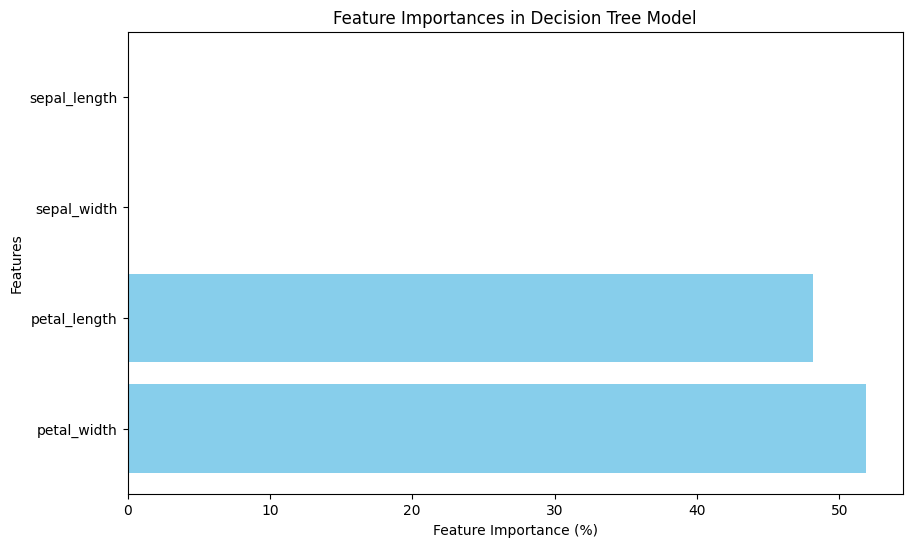

In [11]:
####################
## Your code here ##
####################


import matplotlib.pyplot as plt

# 특성 중요도 가져오기
feature_importances = dt.feature_importances_

# 특성 이름 가져오기
features = df.columns[:-1]  # 'class' 열을 제외한 특성 이름

# 수평 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances * 100, color='skyblue')
plt.xlabel('Feature Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importances in Decision Tree Model')
plt.gca().invert_yaxis()  # 특성을 위에서부터 나열
plt.show()


# 데이터를 시각화(수평 막대 그래프)
# x축에는 중요도(%), y축에는 각 특성의 이름(클래스), 그래프 제목설정, 특성의 나열 순서를 지정한다.




# Q8. Visualize the decision tree

* Answer the question, according to the visualization of your model.
    * Q1 : If the petal width of the iris exceeds 0.8cm, can it be setosa?
    * Q2 : Is the result of the leaf node with the smalles number of samples reliable?
    * Q3 : If petal width > 0.8 and petal length >4.85, What is the probability that of being classified as virginica?

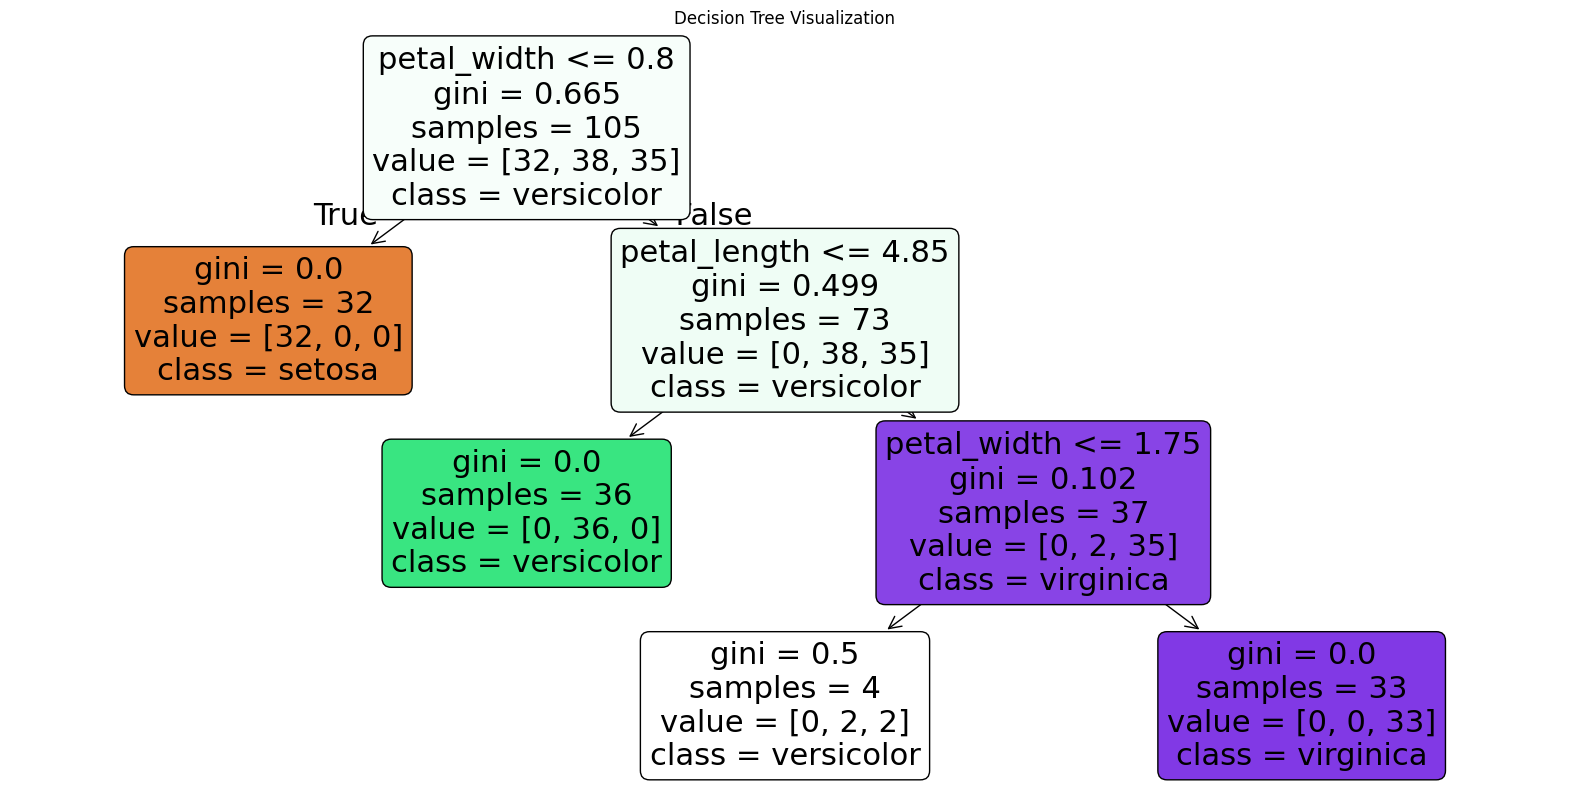

'\nQ1: If the petal width of the iris exceeds 0.8cm, can it be setosa?\n = 만약 붓꽃의 꽃잎 너비가 0.8cm를 초과하면, setosa일 수 있나요?\n A1 : No. 결정 트리에서 petal width > 0.8 조건을 만족하는 경우, setosa 클래스(클래스 0)로 분류되지 않습니다. \n\nQ2: Is the result of the leaf node with the smallest number of samples reliable?\n = 샘플 수가 가장 적은 리프 노드의 결과는 신뢰할 만한가요?\n A2 : No. 데이터가 적을수록 통계적 변동성이 커지기 때문에, 예측이 불안정해질 가능성이 있습니다. \n\nQ3: If petal width > 0.8 and petal length >4.85, What is the probability of being classified as virginica?\n = 꽃잎 너비가 0.8보다 크고, 꽃잎 길이가 4.85보다 크다면, virginica로 분류될 확률은 얼마인가요?\n A3 : \n\n'

In [12]:
####################
## Your code here ##
####################


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 결정 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=df.columns[:-1], class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


# plot_tree 함수는 결정 트리를 시각화
# feature_names에 특성 이름을 전달한다.
# filled=True와 rounded=True 옵션은 노드의 색상과 모양의 구분을 쉽게한다.
# plt.figure(figsize=(00,00))는 그래프 크기를 지정한다.

'''
Q1: If the petal width of the iris exceeds 0.8cm, can it be setosa?
 = 만약 붓꽃의 꽃잎 너비가 0.8cm를 초과하면, setosa일 수 있나요?
 A1 : No. 결정 트리에서 petal width > 0.8 조건을 만족하는 경우, setosa 클래스(클래스 0)로 분류되지 않습니다.

Q2: Is the result of the leaf node with the smallest number of samples reliable?
 = 샘플 수가 가장 적은 리프 노드의 결과는 신뢰할 만한가요?
 A2 : No. 데이터가 적을수록 통계적 변동성이 커지기 때문에, 예측이 불안정해질 가능성이 있습니다.

Q3: If petal width > 0.8 and petal length >4.85, What is the probability of being classified as virginica?
 = 꽃잎 너비가 0.8보다 크고, 꽃잎 길이가 4.85보다 크다면, virginica로 분류될 확률은 얼마인가요?
 A3 : 시각화된 결정 트리에서 petal width > 0.8 및 petal length > 4.85 조건을 만족하는 경로를 따라가면
 virginica(클래스 2)로 분류되는 리프 노드에 도달합니다. (= petal_width <= 1.75 조건)

    - petal_width > 1.75인 경우, 해당 샘플은 virginica로 분류
      => 샘플은 37개의 데이터 중 : virginica : 35개, versicolor 2개
        Ans : 35/37 = 약 94.6%

'''


# Q9. Write your if-else pseudo code to solve iris classification problem, using result of decision tree

* It's ok that code doesn't work.
* Just use two most important rules.

In [15]:
###########################
## your pseudo code here ##
###########################


# Iris 분류를 위한 if-else 의사 코드
'''
if petal_width <= 0.8:
    # petal_width가 0.8 이하이면, setosa로 분류
    class_name = "setosa"
else:
    # petal_width가 0.8 초과일 때
    if petal_length <= 4.85:
        # petal_length가 4.85 이하이면 versicolor로 분류
        class_name = "versicolor"
    else:
        # petal_length가 4.85 초과이면 virginica로 분류
        class_name = "virginica"
'''


# 첫 번째 조건 = petal_width <= 0.8 : 결정 트리는 해당 샘플을 setosa로 분류
# 두 번째 조건 = petal_width > 0.8  : petal_length 값에 따라 추가적으로 분기
#   petal_length <= 4.85이면 versicolor, petal_length > 4.85이면 virginica로 분류




'\nif petal_width <= 0.8:\n    # petal_width가 0.8 이하이면, setosa로 분류\n    class_name = "setosa"\nelse:\n    # petal_width가 0.8 초과일 때\n    if petal_length <= 4.85:\n        # petal_length가 4.85 이하이면 versicolor로 분류\n        class_name = "versicolor"\n    else:\n        # petal_length가 4.85 초과이면 virginica로 분류\n        class_name = "virginica"\n'